In [1]:
from IPython.display import display, Audio
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y, sr = librosa.load('data/doremi.wav', sr=44100)
print(np.shape(y))  # 44100frames/s * 8s = 352800

D = librosa.stft(y, n_fft=2048, hop_length=512)
print(np.shape(D))  # (2048 / 2 + 1, ceil(352800 / 512)) -> (1024, 690)

comps, acts = librosa.decompose.decompose(np.abs(D), n_components=8)
print(np.shape(comps), np.shape(acts))  # (1025, 8) (8, 690)

display(Audio(y, rate=44100))

(352800,)
(1025, 690)
(1025, 8) (8, 690)


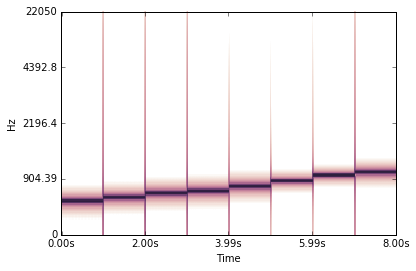

In [3]:
librosa.display.specshow(librosa.logamplitude(np.abs(D) ** 2, ref_power=np.max), sr=44100,  y_axis='log', x_axis='time')

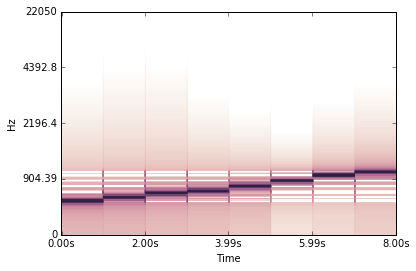

In [4]:
D = comps.dot(acts)
librosa.display.specshow(librosa.logamplitude(D ** 2, ref_power=np.max), sr=44100,  y_axis='log', x_axis='time')
y = librosa.istft(D, hop_length=512)
display(Audio(y, rate=44100))

component 0


component 1


component 2


component 3


component 4


component 5


component 6


component 7


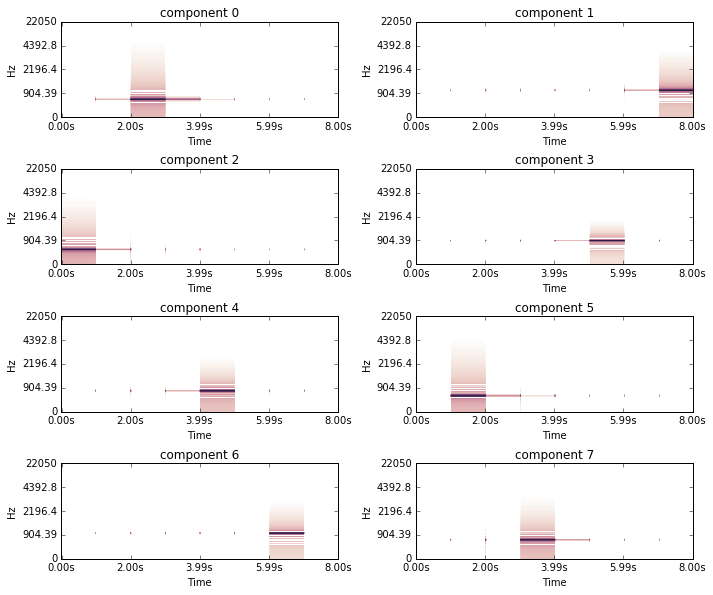

In [5]:
plt.figure(figsize=(10,10))

for i in range(np.shape(comps)[1]):
    D = comps[:,i].reshape(-1, 1) * acts[i,:].reshape(1, -1)
    plt.subplot(int(np.shape(comps)[1] / 2) + 1, 2, i + 1)
    librosa.display.specshow(librosa.logamplitude(D ** 2, ref_power=np.max), sr=44100,  y_axis='log', x_axis='time')
    plt.title('component {}'.format(i))
    y = librosa.istft(D, hop_length=512)
    print('component {}'.format(i))
    display(Audio(y, rate=44100))

plt.tight_layout()